## Import the necessary libraries

In [1]:
from nn import nn, preprocess, io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Read in the positive and negative sequence files

In [2]:
pos_seqs = io.read_text_file("./data/rap1-lieb-positives.txt")
neg_seqs = io.read_fasta_file("./data/yeast-upstream-1k-negative.fa")

## Split the data

The positive sequences are 17 nucleotides in length, whereas the negative sequences are 1,000 nucleotides each. We will therefore split the negative sequences into 17 nucleotide fragments

In [3]:
target_length = len(pos_seqs[0])
negatives_split = []
for seq in neg_seqs:
    split = []
    for i in range(int(len(seq)/target_length)):
        split.append(seq[i*target_length:(i+1)*target_length])
    negatives_split += split

Now we just concatenate the two groups of sequences into our X feature matrix. Additionally, we create a target vector with 0s and 1s (negative seqs and positive seqs, respectively). The amount of 0s and 1s corresponds to the number of negative and positive sequences.

In [4]:
X = pos_seqs + negatives_split
y = np.concatenate([np.ones(len(pos_seqs)), np.zeros(len(negatives_split))]).tolist()

## Implement upsampling procedure

The implemented scheme takes the less predominant label and samples from it with replacement. It samples until it's the same size as the predominant label. This upsamples the minority label to increase its signal and balance the data. We then sample the corresponding sequences using these balanced labels.

In [5]:
X, y = preprocess.sample_seqs(X, y)

## One-Hot Encoding procedure

This scheme implements a dictionary with the numerical encodings for each nucleotide. It iterates over all of the sequences given as input, and applies a list comprehension to each character in the string it's reading, creating a numpy array with the values from the nucleotide encoding dictionary. 

In [6]:
X = preprocess.one_hot_encode_seqs(X)

## Split the data

Not much to say, this is the Scikit-Learn implementation for splitting data, most commonly for ML applications. I used a random state of 42 because it's the answer to the ultimate question of life, the universe, and everything, and a standard split of 70/30 (training/test).

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
y_train = np.array(y_train) # Convert the target vectors to numpy arrays to interact with the neural network
y_test = np.array(y_test)

## Create instance of TF Classifier

First layer has 68 neurons because we're using 17 nucleotide sequences and we're dealing with the 4 nucleotides that make up the genetic code.

In [21]:
layers_clf = [{'input_dim': 68, 'output_dim': 34, 'activation': 'relu'},
              {'input_dim': 34, 'output_dim': 1, 'activation': 'sigmoid'},]
tf_clf = nn.NeuralNetwork(layers_clf, lr = 0.0001, seed = 0, batch_size = 200, epochs = 10, loss_function = "bce")

In [22]:
train_loss, val_loss = tf_clf.fit(X_train, y_train, X_test, y_test)

In [17]:
train_loss

[0.7108239068847924,
 0.7094185217631566,
 0.708228692612189,
 0.7007721495835139,
 0.7014532684606309,
 0.6977285783321082,
 0.6952390825791009,
 0.6929923681884715,
 0.6905302583071853,
 0.693689905611482,
 0.6912731320847639,
 0.6873174572051525,
 0.6855487101335174,
 0.6887728899121579,
 0.6875084434753352,
 0.6818647555171474,
 0.6830440057801545,
 0.6796533627209672,
 0.6795367738061814,
 0.6819082091658022,
 0.6767138042612644,
 0.6791244104204298,
 0.6709095806645652,
 0.6816441081497321,
 0.6706981619977828,
 0.6832663958293865,
 0.6810741108418792,
 0.6913411680565119,
 0.693428284907371,
 0.688329076287631,
 0.6915666569836693,
 0.6950015107678276,
 0.6967280753997293,
 0.6960932104116326,
 0.7035147989388831,
 0.6954734113788383,
 0.7086305113456802,
 0.7084936530027306,
 0.7094452342179091,
 0.6925342508412341,
 0.7168036637207104,
 0.7298427325212729,
 0.7153715937364236,
 0.731380164247178,
 0.7165926274663265,
 0.717246892289121,
 0.752676054885769,
 0.7427805967121254,

In [18]:
val_loss

[0.711041061135379,
 0.7069235348831511,
 0.7033368402611835,
 0.700335655019907,
 0.6976286376040091,
 0.6956107646303511,
 0.6937548147039138,
 0.6921099948834065,
 0.6905444005536192,
 0.6892500212988335,
 0.687856892754066,
 0.6865401209499102,
 0.6853472655390951,
 0.6842957863046317,
 0.6833911282291357,
 0.6825352166310149,
 0.6819000849281138,
 0.6814673254813141,
 0.6811691830166091,
 0.6810448176936806,
 0.68103295230897,
 0.6812375540585035,
 0.6815794318213233,
 0.6823091538088656,
 0.6830431543470353,
 0.6841937910588093,
 0.6854614980397682,
 0.6870398977198002,
 0.6887583914851114,
 0.6906443835191862,
 0.6926751320073015,
 0.6949177684901178,
 0.6973669925173771,
 0.6999450774036111,
 0.702770694786808,
 0.7055797455213025,
 0.7086448714315473,
 0.7118773342740827,
 0.7152142083678575,
 0.7185071220882471,
 0.7221194114769844,
 0.7259609638749865,
 0.7297904962919455,
 0.7338481959033538,
 0.7378291932803601,
 0.7419654885499379,
 0.7465110325375733,
 0.7510446568250165

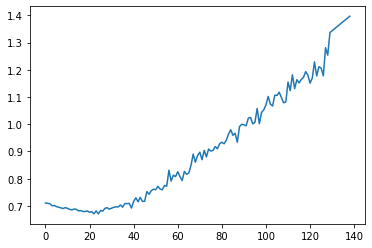

In [19]:
plt.plot(train_loss)
plt.show()

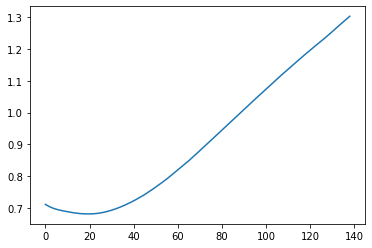

In [20]:
plt.plot(val_loss)
plt.show()